<a href="https://colab.research.google.com/github/IsuruMDasanayake/Heater-Control-System-in-Fuzzy/blob/main/HeaterControlFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heater Control System**



*   **Inputs:**
    Current Temperature (°C): Cold, Comfortable, Hot &
    Desired Temperature (°C): Low, Medium, High

*   **Outputs:**
    Heater Power Level (%): Off, Low, Medium, High



In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.3 MB/s eta 0:00:00


**Import Libraries & Create Variables**

In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy input variables
current_temp = ctrl.Antecedent(np.arange(0, 41, 1), 'current_temp')
desired_temp = ctrl.Antecedent(np.arange(0, 41, 1), 'desired_temp')

# Define fuzzy output variable
heater_power = ctrl.Consequent(np.arange(0, 101, 1), 'heater_power')


**Define Membership Functions**

In [3]:
# Current Temperature Membership Functions
    #Cold: Trapezoidal (0-15°C)
    #Comfortable: Triangular (10-25°C)
    #Hot: Trapezoidal (20-40°C)

current_temp['cold'] = fuzz.trapmf(current_temp.universe, [0, 0, 10, 15])
current_temp['comfortable'] = fuzz.trimf(current_temp.universe, [10, 20, 25])
current_temp['hot'] = fuzz.trapmf(current_temp.universe, [20, 30, 40, 40])

# Desired Temperature Membership Functions
    #Low: Trapezoidal (0-15°C)
    #Medium: Triangular (10-25°C)
    #High: Trapezoidal (20-40°C

desired_temp['low'] = fuzz.trapmf(desired_temp.universe, [0, 0, 10, 15])
desired_temp['medium'] = fuzz.trimf(desired_temp.universe, [10, 20, 25])
desired_temp['high'] = fuzz.trapmf(desired_temp.universe, [20, 30, 40, 40])

#Heater Power Membership Functions
    #Off: Trapezoidal (0-25%)
    #Low: Triangular (20-50%)
    #Medium: Triangular (40-70%)
    #High: Trapezoidal (60-100%)
heater_power['off'] = fuzz.trapmf(heater_power.universe, [0, 0, 10, 25])
heater_power['low'] = fuzz.trimf(heater_power.universe, [20, 35, 50])
heater_power['medium'] = fuzz.trimf(heater_power.universe, [40, 55, 70])
heater_power['high'] = fuzz.trapmf(heater_power.universe, [60, 80, 100, 100])

**Define Fuzzy Rules**

    IF Current temperature is Cold AND Desired temperature is High THEN Heater power is High.
    IF Current temperature is Comfortable AND Desired temperature is Medium THEN Heater power is Low.
    IF Current temperature is Hot AND Desired temperature is Low THEN Heater power is Off.
    IF Current temperature is Cold AND Desired temperature is Medium THEN Heater power is Medium.
    IF Current temperature is Comfortable AND Desired temperature is High THEN Heater power is Medium.
    IF Current temperature is Hot AND Desired temperature is High THEN Heater power is Low.
    IF Current temperature is Cold AND Desired temperature is Low THEN Heater power is Low.
    IF Current temperature is Comfortable AND Desired temperature is Low THEN Heater power is Off.

In [4]:
# Define fuzzy rules
rule1 = ctrl.Rule(current_temp['cold'] & desired_temp['high'], heater_power['high'])
rule2 = ctrl.Rule(current_temp['comfortable'] & desired_temp['medium'], heater_power['low'])
rule3 = ctrl.Rule(current_temp['hot'] & desired_temp['low'], heater_power['off'])
rule4 = ctrl.Rule(current_temp['cold'] & desired_temp['medium'], heater_power['medium'])
rule5 = ctrl.Rule(current_temp['comfortable'] & desired_temp['high'], heater_power['medium'])
rule6 = ctrl.Rule(current_temp['hot'] & desired_temp['high'], heater_power['low'])
rule7 = ctrl.Rule(current_temp['cold'] & desired_temp['low'], heater_power['low'])
rule8 = ctrl.Rule(current_temp['comfortable'] & desired_temp['low'], heater_power['off'])

**Creating the Fuzzy Control System**

In [5]:
# Create control system
heater_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])

# Create simulation
heater_simulation = ctrl.ControlSystemSimulation(heater_control_system)

**Testing the System with Different Scenarios**

In [11]:
# Scenario 01
# Set input values
heater_simulation.input['current_temp'] = 10
heater_simulation.input['desired_temp'] = 30

# Compute the output
heater_simulation.compute()
print(f"Heater Power Level: {heater_simulation.output['heater_power']:.2f}%")

Heater Power Level: 84.44%


In [12]:
# Senario 02
heater_simulation.input['current_temp'] = 25
heater_simulation.input['desired_temp'] = 20

# Compute the output
heater_simulation.compute()
print(f"Heater Power Level: {heater_simulation.output['heater_power']:.2f}%")

Heater Power Level: 84.44%


In [13]:
# Senario 03
heater_simulation.input['current_temp'] = 23
heater_simulation.input['desired_temp'] = 10

# Compute the output
heater_simulation.compute()
print(f"Heater Power Level: {heater_simulation.output['heater_power']:.2f}%")

Heater Power Level: 11.07%


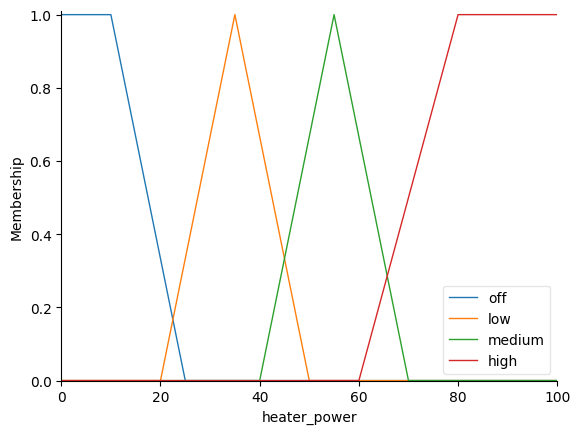

In [14]:
# Visualizing the heater power membership functions
heater_power.view()
plt.show()